In [1]:
# import necessary libraries
import pandas as pandas
import matplotlib.pyplot as plot
import seaborn as plot2
import scipy.stats as stats

**Load the dataset and check the dataset information like column names, data types, count of non-null values, etc**

In [2]:
# load the dataset
dataset = pandas.read_csv('walmart_data.csv')
# check dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


**Check if the dataset is clean or not, by checking for null values, duplicates, etc**

In [3]:
# checking null values
dataset.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [4]:
# checking duplicate values
dataset.duplicated().sum()

0

**Understand the dataset by looking at the rows and columns and checking summary statistics like mean, median, mode, etc**

In [5]:
# understanding the data in dataset
dataset.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [6]:
# checking summary statistics of columns having numeric values
print(dataset.describe())

            User_ID     Occupation  Marital_Status  Product_Category  \
count  5.500680e+05  550068.000000   550068.000000     550068.000000   
mean   1.003029e+06       8.076707        0.409653          5.404270   
std    1.727592e+03       6.522660        0.491770          3.936211   
min    1.000001e+06       0.000000        0.000000          1.000000   
25%    1.001516e+06       2.000000        0.000000          1.000000   
50%    1.003077e+06       7.000000        0.000000          5.000000   
75%    1.004478e+06      14.000000        1.000000          8.000000   
max    1.006040e+06      20.000000        1.000000         20.000000   

            Purchase  
count  550068.000000  
mean     9263.968713  
std      5023.065394  
min        12.000000  
25%      5823.000000  
50%      8047.000000  
75%     12054.000000  
max     23961.000000  


In [7]:
# checking summary statistics of columns having non-numeric values
print(dataset.describe(include='object'))

       Product_ID  Gender     Age City_Category Stay_In_Current_City_Years
count      550068  550068  550068        550068                     550068
unique       3631       2       7             3                          5
top     P00265242       M   26-35             B                          1
freq         1880  414259  219587        231173                     193821


**Checking purchase price distribution using histogram**

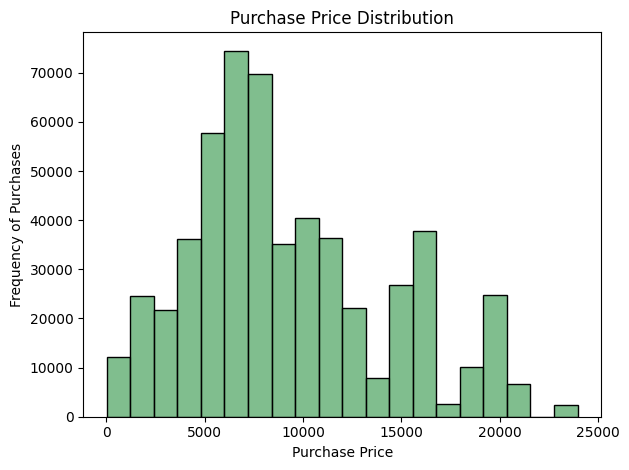

In [40]:
plot2.histplot(dataset['Purchase'], bins=20, color='#55A868') # plotting histogram using seaborn
plot.title('Purchase Price Distribution') # giving title for the chart
plot.xlabel('Purchase Price') # name of x-axis
plot.ylabel('Frequency of Purchases') # name of y-axis
plot.tight_layout() # adjusts the position of the chart to avoid overlapping of labels
plot.show() # display the plot

**Checking for outliers in purchase price distribution using boxplot**

q1: 5823  q2: 8047  q3: 12054  minimum: 12  maximun: 23961  Outliers: 2677


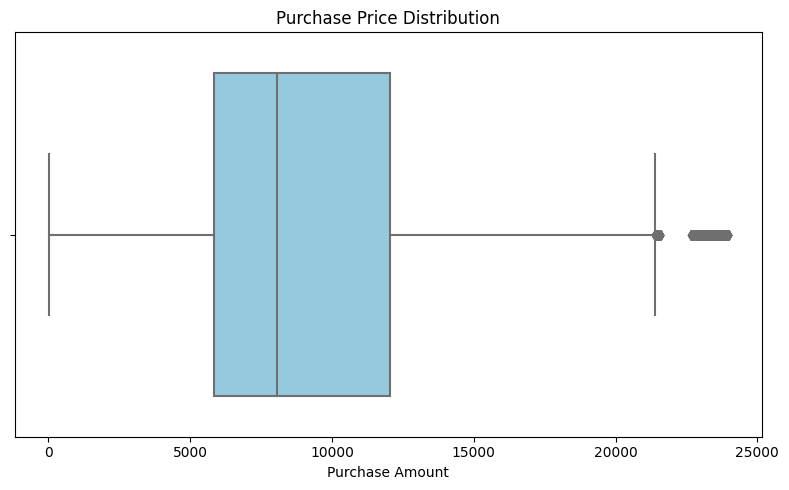

In [41]:
# Calculate IQR (Interquartile Range) and determine outliers
q1 = int(dataset['Purchase'].quantile(0.25)) # calculating Q-1 value for purchase column
q2 = int(dataset['Purchase'].quantile(0.50)) # calculating Q-2 value for purchase column
q3 = int(dataset['Purchase'].quantile(0.75)) # calculating Q-3 value for purchase column
minimum = dataset['Purchase'].min() # calculating minimum value in purchase column
maximum = dataset['Purchase'].max() # calculating maximum value in purchase column
iqr = q3 - q1 # calculating iqr for purchase column
lower_bound = q1 - 1.5 * iqr # calculating lower bound for purchase column
upper_bound = q3 + 1.5 * iqr # calculating upper bound for purchase column
outliers = dataset[(dataset['Purchase'] < lower_bound) | (dataset['Purchase'] > upper_bound)] # checking for outliers
outlier_count = len(outliers)  # calculating the total count of outliers in purchase column
print('q1:',q1,'','q2:',q2,'','q3:',q3,'','minimum:',minimum,'','maximun:',maximum,'','Outliers:',outlier_count) # printing all the above metrics

# plotting boxplot
plot.figure(figsize=(8, 5)) # giving figure size
plot2.boxplot(data=dataset, x='Purchase', color='skyblue') # plotting the boxplot using seaborn
plot.title('Purchase Price Distribution') # title of boxplot
plot.xlabel('Purchase Amount') # name of x-axis
plot.tight_layout() # adjusts the position of the chart to avoid overlapping of labels
plot.show() # display the plot

**Checking gender distribution using pie chart**

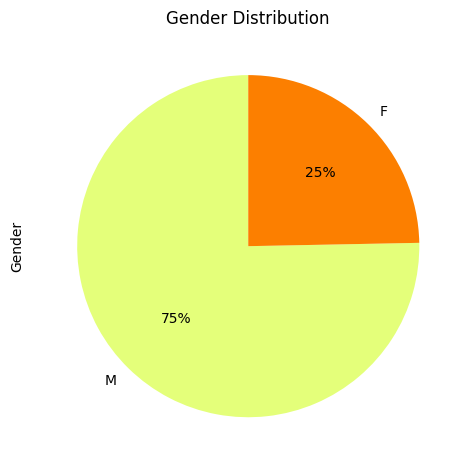

In [20]:
gender_spread = dataset['Gender'].value_counts() # calculate the total counts of male and female
gender_spread.plot(kind='pie', autopct='%1.0f%%', startangle=90, colormap='Wistia') # plotting pie chart using matplotlib
plot.title('Gender Distribution') # title of pie chart
plot.tight_layout() # adjusts the position of the chart to avoid overlapping of labels
plot.show() # display the plot

**Checking average and total purchase amount by gender using bar plot**

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64


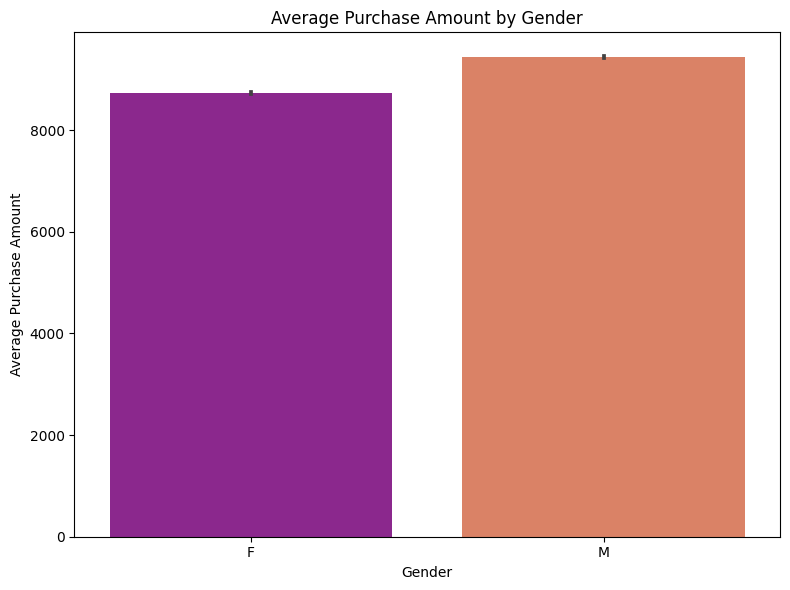

In [39]:
print(dataset.groupby(['Gender'])['Purchase'].mean()) # printing average purchase amount of each gender
plot.figure(figsize=(8,6)) # giving figure size for the barplot
plot2.barplot(x='Gender', y='Purchase', data=dataset, estimator='mean', palette='plasma') # plotting barplot using seaborn
plot.title('Average Purchase Amount by Gender') # title for barplot
plot.xlabel('Gender') # name of x-axis
plot.ylabel('Average Purchase Amount') # name of y-axis
plot.tight_layout() # adjusts the position of the chart to avoid overlapping of labels
plot.show() # display the plot

  Gender    Purchase
0      F  1186232642
1      M  3909580100


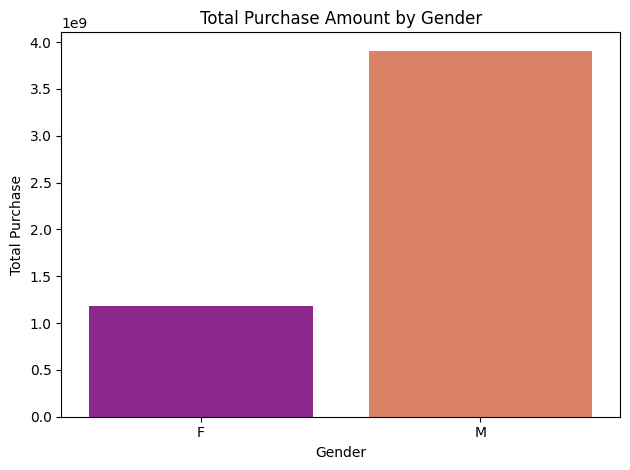

In [5]:
gp = dataset.groupby(['Gender'])['Purchase'].sum().reset_index() # printing total purchase amount of each gender
print(gp)
plot2.barplot(data=gp, x='Gender', y='Purchase', palette='plasma') # plotting barplot using seaborn
plot.title('Total Purchase Amount by Gender') # title for barplot
plot.xlabel('Gender') # name of x-axis
plot.ylabel('Total Purchase') # name of y-axis
plot.tight_layout() # adjusts the position of the chart to avoid overlapping of labels
plot.show() # display the plot

**Checking the true population mean of the purchase amount spent by gender using confidence interval**

In [3]:
# Grouping by Gender and calculating mean and standard error
gender_groups = dataset.groupby('Gender')['Purchase']
means = gender_groups.mean()

std_errors = gender_groups.sem()  # Standard error of the mean

# Define confidence level (e.g., 95%)
confidence_level = 0.95
z = stats.norm.ppf(1 - (1 - confidence_level) / 2)  # Z-score for 95% CI

# Calculate confidence intervals
confidence_intervals = {
    gender: (mean - z * std_err, mean + z * std_err)
    for gender, mean, std_err in zip(means.index, means, std_errors)
}

# Print confidence intervals
for gender, ci in confidence_intervals.items():
    print(f"{gender}: {ci}")

F: (8709.21154714068, 8759.919983170272)
M: (9422.01944736257, 9453.032633581959)


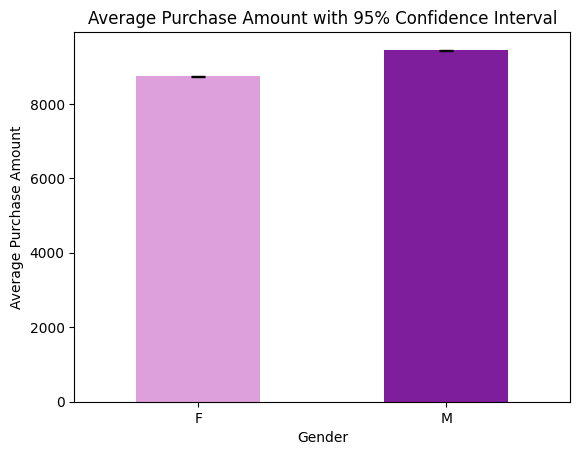

In [9]:
# Means and errors for plotting
means = gender_groups.mean()
errors = z * gender_groups.sem()

# Bar plot with error bars
means.plot(kind='bar', yerr=errors, capsize=5, color=['#DDA0DD', '#7E1E9C'])
plot.title('Average Purchase Amount with 95% Confidence Interval')
plot.xlabel('Gender')
plot.ylabel('Average Purchase Amount')
plot.xticks(rotation=0)
plot.show()

**Checking age distribution and gender distribution among age groups**

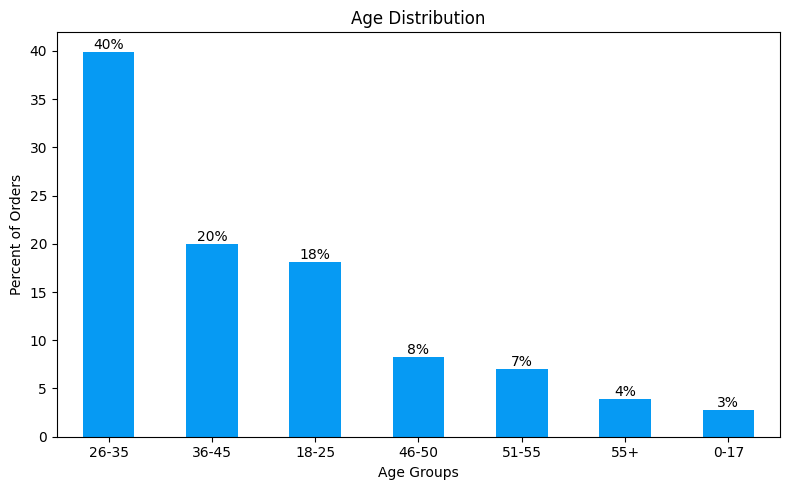

In [8]:
age_spread = sum(dataset['Age'].value_counts()) #total number of orders placed by all age groups
value = dataset['Age'].value_counts() # number of orders placed by each age group
percent = value * 100 / age_spread # calculating the percentage of total orders purchased by age groups

# Plot the bar graph
ax = percent.plot(kind='bar', color='#069AF3', figsize=(8, 5))

# Add percentages on top of the bars using for loop
for index, percentage in enumerate(percent):
    ax.text(index, percentage, f'{percentage:1.0f}%', ha='center', va='bottom', fontsize=10)

# Set labels and title
plot.title('Age Distribution')
plot.xlabel('Age Groups') # name of x-axis
plot.ylabel('Percent of Orders') # name of y-axis
plot.xticks(rotation=0)  # Rotate x-axis labels for better visibility
plot.tight_layout()  # Adjust layout to fit everything nicely
plot.show() # displays the plot

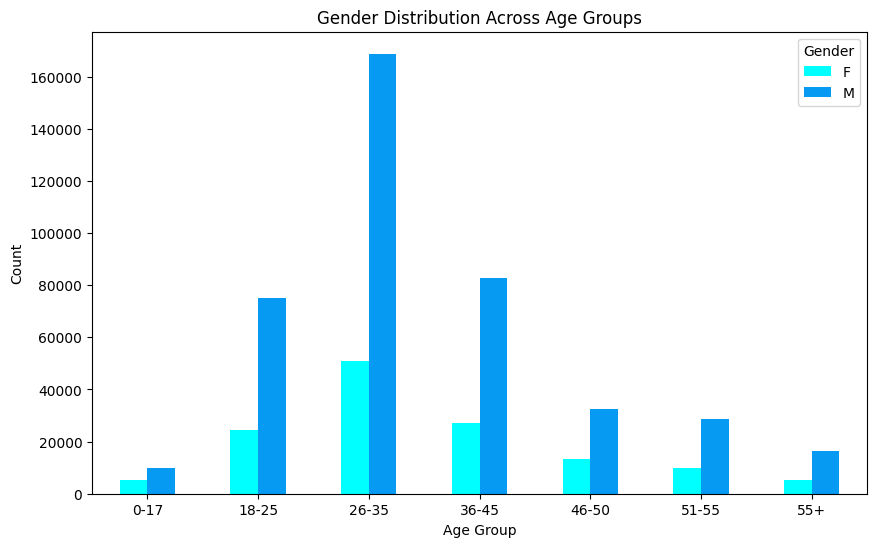

In [11]:
# Create a crosstab of Gender and Age
gender_age_crosstab = pandas.crosstab(dataset['Age'], dataset['Gender'])

# Plot stacked bar chart
gender_age_crosstab.plot(kind='bar', figsize=(10, 6), color= ['#00FFFF', '#069AF3'])

# Add title and labels
plot.title('Gender Distribution Across Age Groups')
plot.xlabel('Age Group')
plot.xticks(rotation=360)
plot.ylabel('Count')
plot.legend(title='Gender')

# Show plot
plot.show()

**Checking average and total purchase amount by age groups**

     Age     Purchase
5  51-55  9534.808031
6    55+  9336.280459
3  36-45  9331.350695
2  26-35  9252.690633
4  46-50  9208.625697
1  18-25  9169.663606
0   0-17  8933.464640


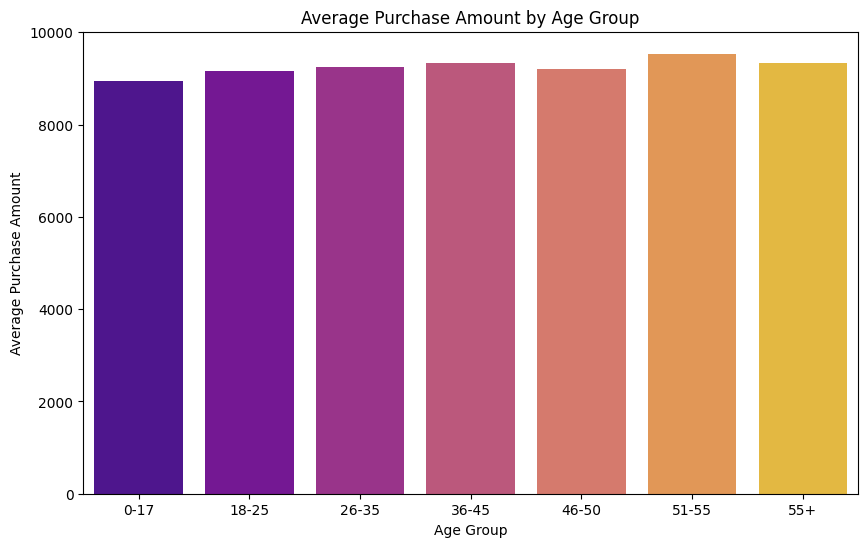

In [18]:
# Average Purchase Amount by each Age group
age_purchase = dataset.groupby('Age')['Purchase'].mean().reset_index()
print(age_purchase.sort_values(by='Purchase', ascending=False))

# Bar Plot: Average Purchase by Age Group
plot.figure(figsize=(10, 6))
plot2.barplot(data=age_purchase, x='Age', y='Purchase', palette='plasma')
plot.title('Average Purchase Amount by Age Group')
plot.xlabel('Age Group')
plot.ylabel('Average Purchase Amount')
plot.show()

     Age    Purchase
2  26-35  2031770578
3  36-45  1026569884
1  18-25   913848675
4  46-50   420843403
5  51-55   367099644
6    55+   200767375
0   0-17   134913183


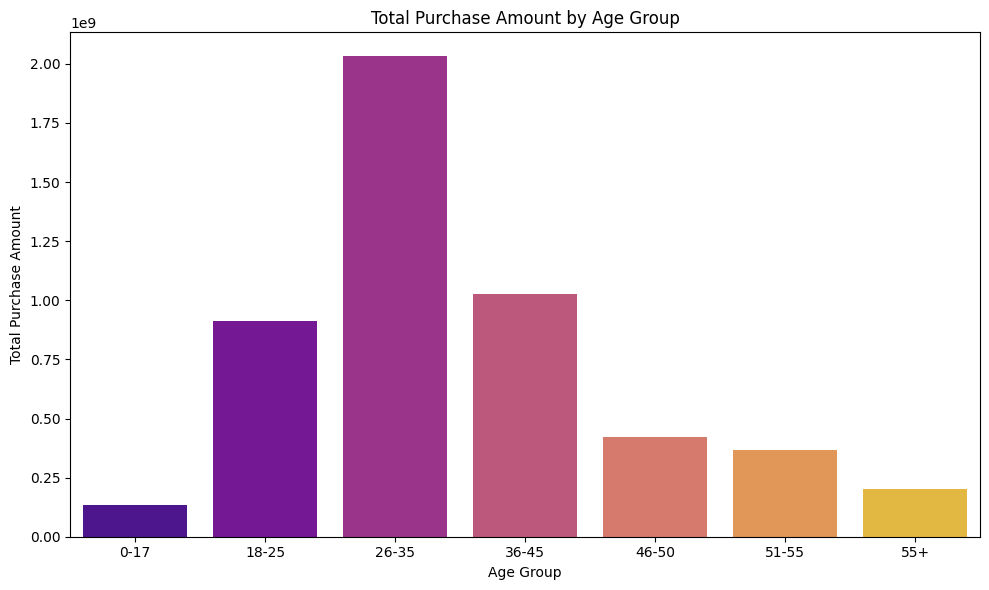

In [22]:
# Total Purchase Amount by each Age group
age_purchase_total = dataset.groupby('Age')['Purchase'].sum().reset_index()
print(age_purchase_total.sort_values(by='Purchase', ascending=False))

# Bar Plot: Total Purchase by Age Group
plot.figure(figsize=(10, 6)) # giving figure size
plot2.barplot(data=age_purchase_total, x='Age', y='Purchase', palette='plasma')
plot.title('Total Purchase Amount by Age Group')
plot.xlabel('Age Group')
plot.ylabel('Total Purchase Amount')
plot.tight_layout()
plot.show()

**i) Checking city category distribution means customers belong to which city category
ii) average and total purchase amount by customers belonging to specific city category**

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

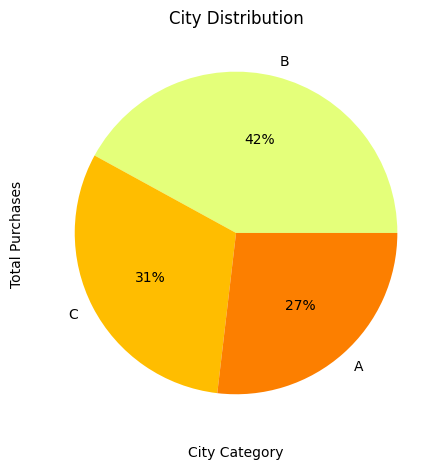

In [53]:
print(dataset['City_Category'].value_counts()) # printing the total purchases made by each city category
dataset['City_Category'].value_counts().plot(kind='pie', autopct='%1.f%%', colormap='Wistia') # plotting the pie chart
plot.title('City Distribution') # title of the chart
plot.xlabel('City Category')  # name of x-axis
plot.ylabel('Total Purchases') # name of y-axis
plot.tight_layout() # adjusts the layout 
plot.show # displays the chart

  City_Category     Purchase
2             C  9719.920993
1             B  9151.300563
0             A  8911.939216


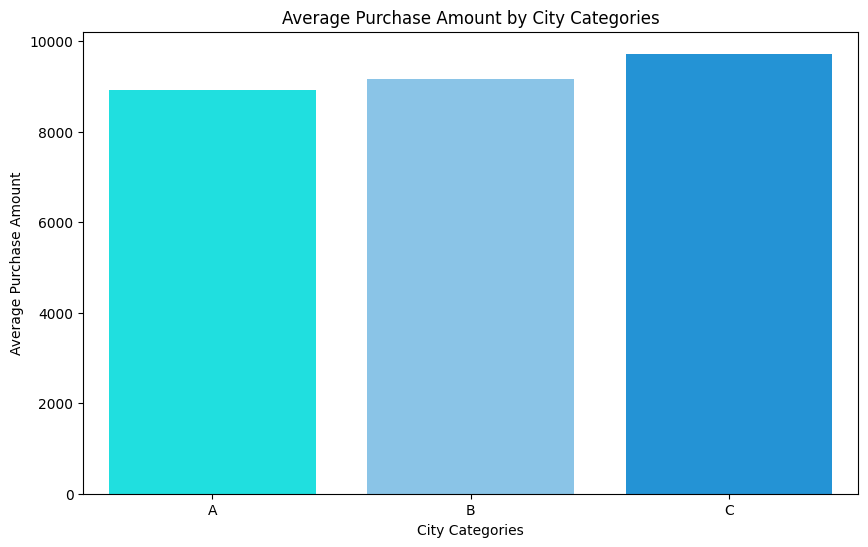

In [34]:
# Average Purchase Amount by City Categories
city_purchase = dataset.groupby('City_Category')['Purchase'].mean().reset_index()
print(city_purchase.sort_values(by='Purchase', ascending=False))
# Bar Plot: Average Purchase by City Categories
plot.figure(figsize=(10, 6))
plot2.barplot(data=city_purchase, x='City_Category', y='Purchase', palette=['#00FFFF', '#7BC8F6', '#069AF3'])
plot.title('Average Purchase Amount by City Categories')
plot.xlabel('City Categories')
plot.ylabel('Average Purchase Amount')
plot.show()

  City_Category    Purchase
1             B  2115533605
2             C  1663807476
0             A  1316471661


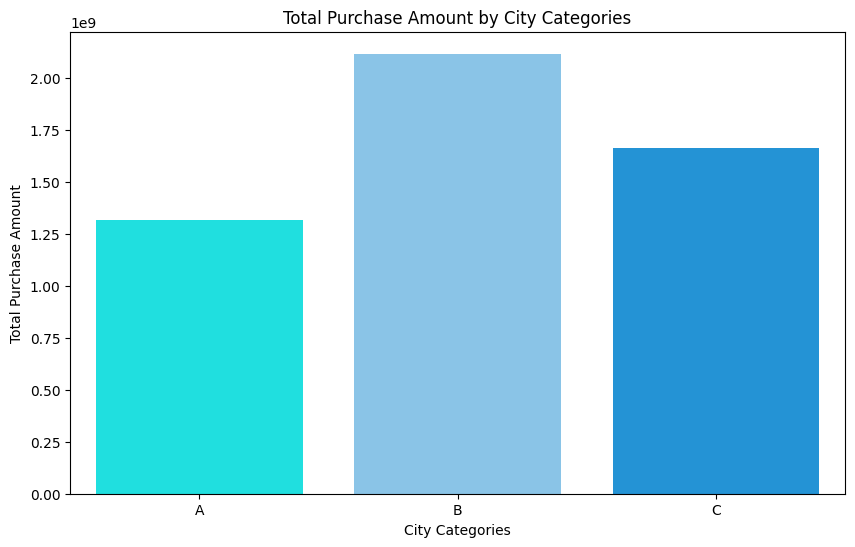

In [35]:
# Total Purchase Amount by each City Categories
city_purchase_total = dataset.groupby('City_Category')['Purchase'].sum().reset_index()
print(city_purchase_total.sort_values(by='Purchase', ascending=False))

# Bar Plot: Total Purchase by City Categories
plot.figure(figsize=(10, 6))
plot2.barplot(data=city_purchase_total, x='City_Category', y='Purchase', palette=['#00FFFF', '#7BC8F6', '#069AF3'])
plot.title('Total Purchase Amount by City Categories')
plot.xlabel('City Categories')
plot.ylabel('Total Purchase Amount')
plot.show()

**i) Checking occupation categories distribution means customers belong to which occupation categories
ii) average and total purchase amount by customers belonging to specific occupation categories**

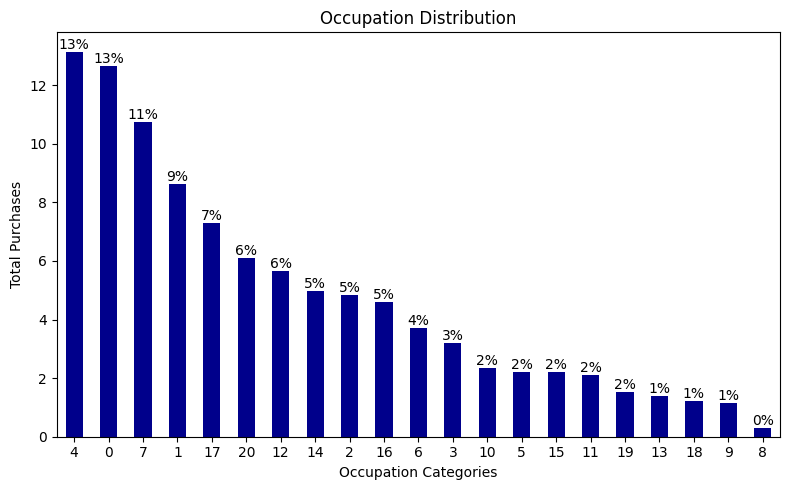

In [43]:
# calculating the occupation distribution in percentage
occupation = sum(dataset['Occupation'].value_counts())
value = dataset['Occupation'].value_counts()
percent = value * 100 / occupation

# Plot the bar graph
ax = percent.plot(kind='bar', color='darkblue', figsize=(8, 5))

# Add percentages on top of the bars
for index, percentage in enumerate(percent):
    ax.text(index, percentage, f'{percentage:1.0f}%', ha='center', va='bottom', fontsize=10)

# Set labels and title
plot.title('Occupation Distribution')
plot.xlabel('Occupation Categories')
plot.ylabel('Total Purchases')
plot.xticks(rotation=0)  # Rotates x-axis labels for better visibility
plot.tight_layout()  # Adjust layout to fit everything nicely
plot.show()

    Occupation     Purchase
17          17  9821.478236
12          12  9796.640239
15          15  9778.891163
8            8  9532.592497
14          14  9500.702772
7            7  9425.728223
16          16  9394.464349
5            5  9333.149298
13          13  9306.351061
6            6  9256.535691


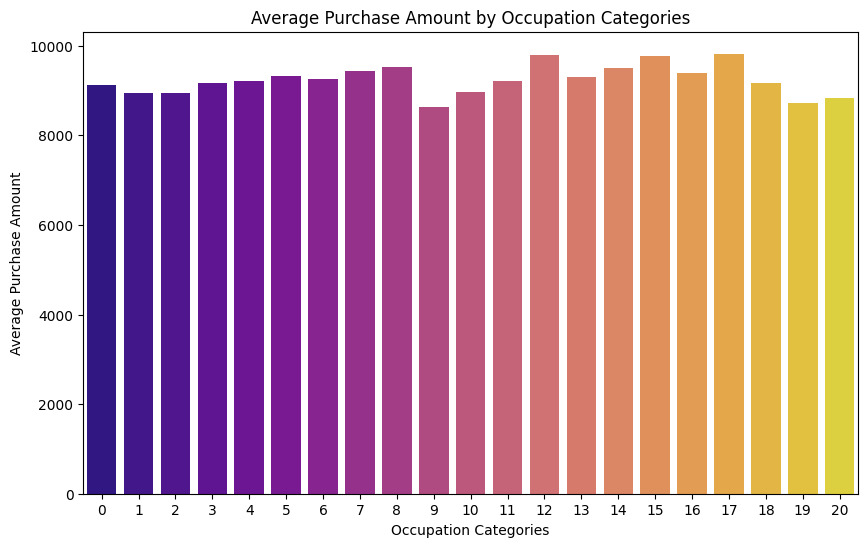

In [7]:
# Average Purchase Amount by Occupation Categories
occupation_purchase = dataset.groupby('Occupation')['Purchase'].mean().reset_index()
print(occupation_purchase.sort_values(by='Purchase', ascending=False).head(10))

# Bar Plot: Average Purchase by Occupation Categories
plot.figure(figsize=(10, 6))
plot2.barplot(data=occupation_purchase, x='Occupation', y='Purchase', palette='plasma')
plot.title('Average Purchase Amount by Occupation Categories')
plot.xlabel('Occupation Categories')
plot.ylabel('Average Purchase Amount')
plot.show()

    Occupation   Purchase
4            4  666244484
0            0  635406958
7            7  557371587
1            1  424614144
17          17  393281453
12          12  305449446
20          20  296570442
14          14  259454692
16          16  238346955
2            2  238028583


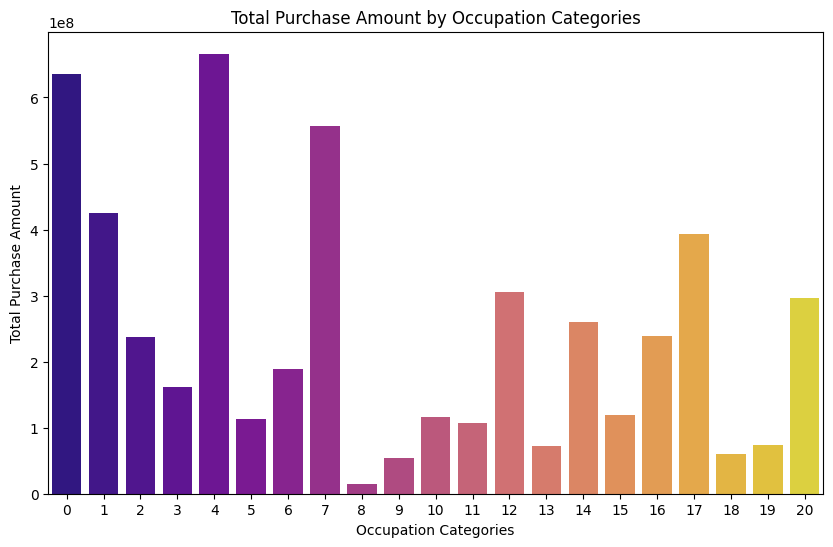

In [8]:
# Total Purchase Amount by Occupation Categories
total_occupation_purchase = dataset.groupby('Occupation')['Purchase'].sum().reset_index()
print(total_occupation_purchase.sort_values(by='Purchase', ascending=False).head(10))

# Bar Plot: Total Purchase by Occupation Categories
total_occupation_purchase = dataset.groupby('Occupation')['Purchase'].sum().reset_index()
plot.figure(figsize=(10, 6))
plot2.barplot(data=total_occupation_purchase, x='Occupation', y='Purchase', palette='plasma')
plot.title('Total Purchase Amount by Occupation Categories')
plot.xlabel('Occupation Categories')
plot.ylabel('Total Purchase Amount')
plot.show()

**i) Checking marital status distribution means how much customers are married or not
ii) average and total purchase amount by customers those are married and not married**

0    324731
1    225337
Name: Marital_Status, dtype: int64


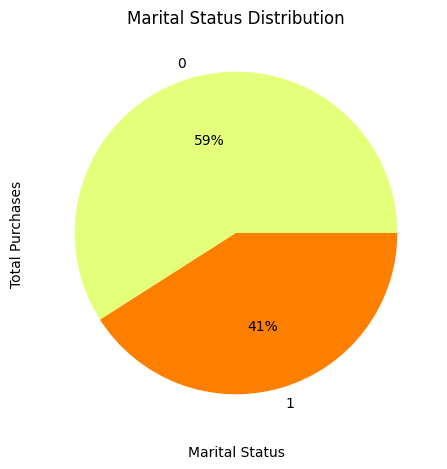

In [56]:
# checking how much percentage of customers who are married or not
print(dataset['Marital_Status'].value_counts())
dataset['Marital_Status'].value_counts().plot(kind='pie', autopct='%1.f%%', colormap='Wistia')
plot.title('Marital Status Distribution')
plot.xlabel('Marital Status')
plot.ylabel('Total Purchases')
plot.tight_layout()
plot.show()

   Marital_Status     Purchase
0               0  9265.907619
1               1  9261.174574


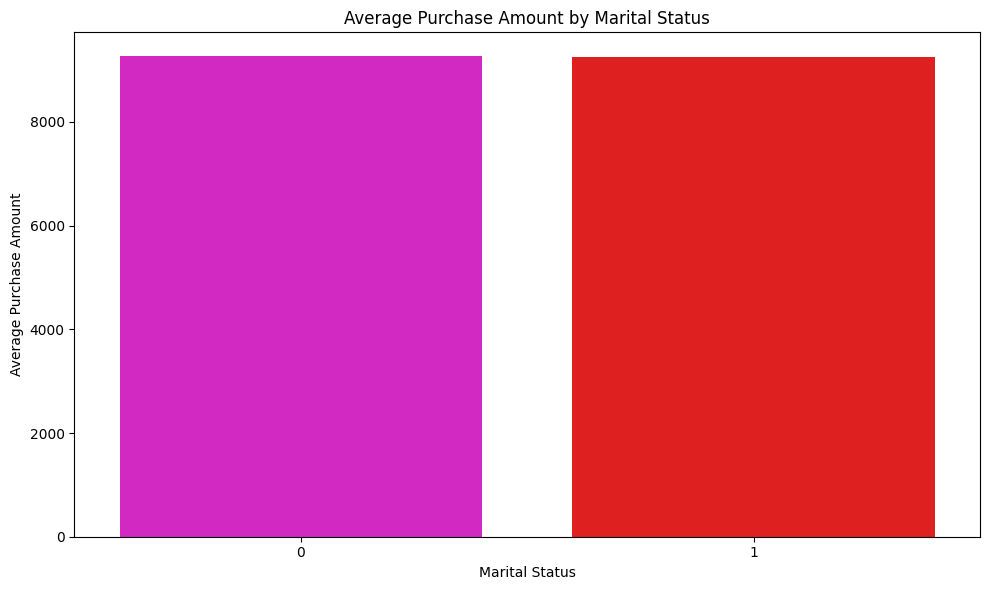

In [63]:
# Average Purchase Amount by Marital Status
marital_purchase = dataset.groupby('Marital_Status')['Purchase'].mean().reset_index()
print(marital_purchase.sort_values(by='Purchase', ascending=False))

# Bar Plot: Average Purchase by Marital Status
plot.figure(figsize=(10, 6))
plot2.barplot(data=marital_purchase, x='Marital_Status', y='Purchase', palette=['#ED0DD9', '#FF0000'])
plot.title('Average Purchase Amount by Marital Status')
plot.xlabel('Marital Status')
plot.ylabel('Average Purchase Amount')
plot.tight_layout()
plot.show()

   Marital_Status    Purchase
0               0  3008927447
1               1  2086885295


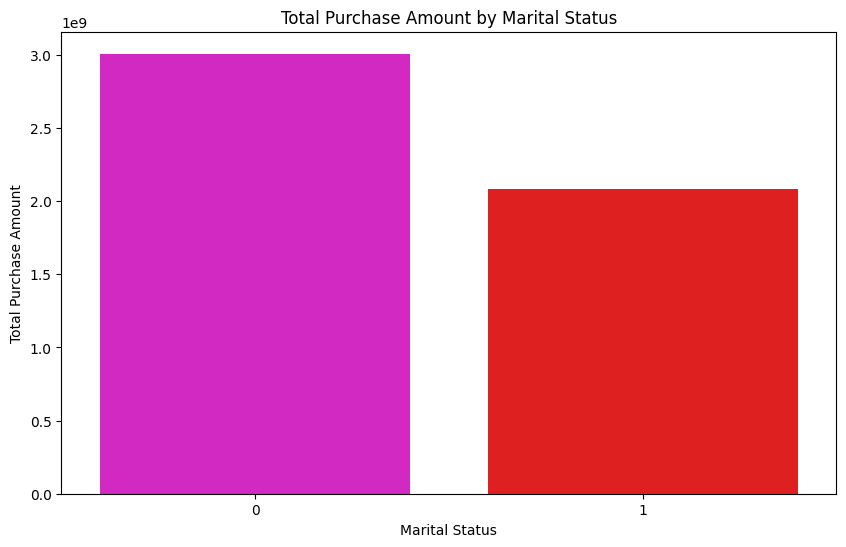

In [62]:
# Total Purchase Amount by Marital Status
total_marital_purchase = dataset.groupby('Marital_Status')['Purchase'].sum().reset_index()
print(total_marital_purchase.sort_values(by='Purchase', ascending=False))

# Bar Plot: Total Purchase by Marital Status
plot.figure(figsize=(10, 6))
plot2.barplot(data=total_marital_purchase, x='Marital_Status', y='Purchase', palette=['#ED0DD9', '#FF0000'])
plot.title('Total Purchase Amount by Marital Status')
plot.xlabel('Marital Status')
plot.ylabel('Total Purchase Amount')
plot.show()

**i) Checking stay in current city distribution means how many years customers have lived in their current city
ii) average and total purchase amount by duration of stay in current city**

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64


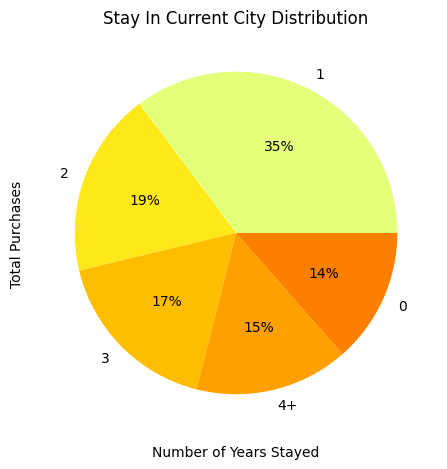

In [66]:
# stay in current city years distribution
print(dataset['Stay_In_Current_City_Years'].value_counts())
dataset['Stay_In_Current_City_Years'].value_counts().plot(kind='pie', autopct='%1.f%%', colormap='Wistia')
plot.title('Stay In Current City Distribution')
plot.xlabel('Number of Years Stayed')
plot.ylabel('Total Purchases')
plot.tight_layout()
plot.show()

  Stay_In_Current_City_Years     Purchase
2                          2  9320.429810
3                          3  9286.904119
4                         4+  9275.598872
1                          1  9250.145923
0                          0  9180.075123


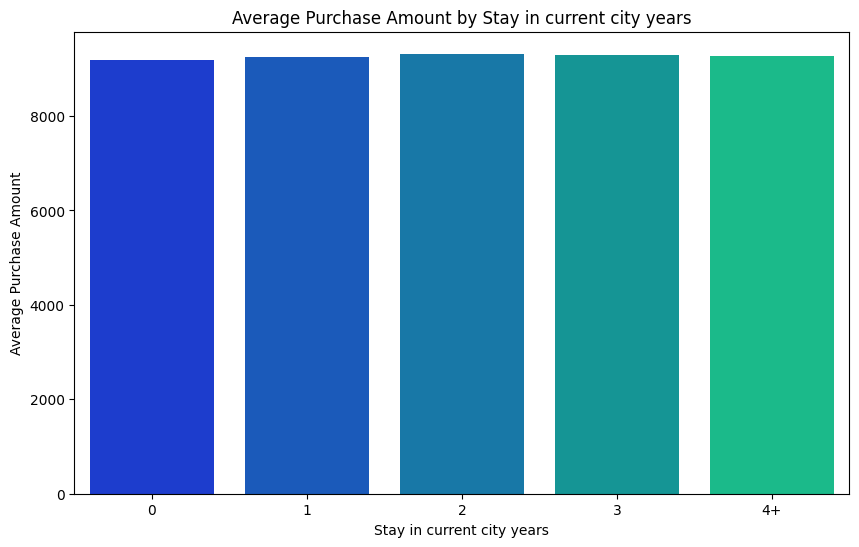

In [68]:
# Average Purchase Amount by Stay in current city years
stay_purchase = dataset.groupby('Stay_In_Current_City_Years')['Purchase'].mean().reset_index()
print(stay_purchase.sort_values(by='Purchase', ascending=False))

# Bar Plot: Average Purchase by Stay in current city years
plot.figure(figsize=(10, 6))
plot2.barplot(data=stay_purchase, x='Stay_In_Current_City_Years', y='Purchase', palette='winter')
plot.title('Average Purchase Amount by Stay in current city years')
plot.xlabel('Stay in current city years')
plot.ylabel('Average Purchase Amount')
plot.show()

  Stay_In_Current_City_Years    Purchase
1                          1  1792872533
2                          2   949173931
3                          3   884902659
4                         4+   785884390
0                          0   682979229


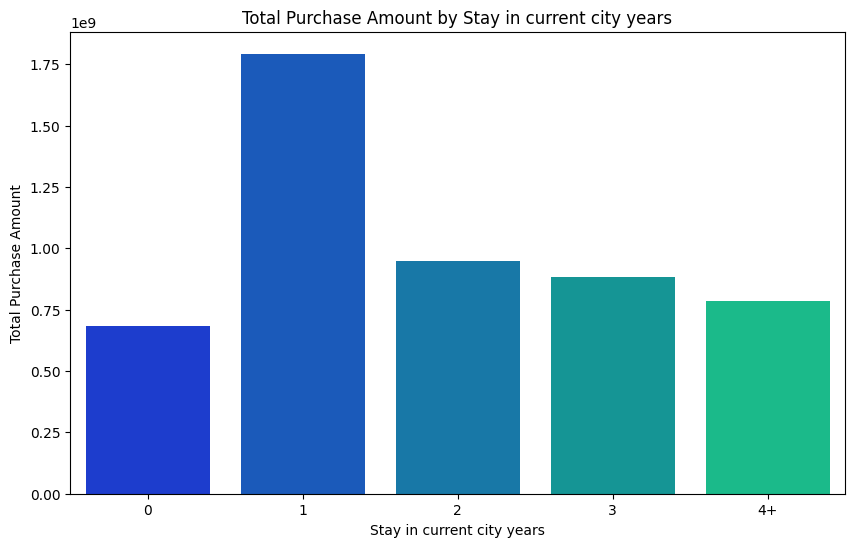

In [70]:
# Total Purchase Amount by Stay in current city years
total_stay_purchase = dataset.groupby('Stay_In_Current_City_Years')['Purchase'].sum().reset_index()
print(total_stay_purchase.sort_values(by='Purchase', ascending=False))

# Bar Plot: Total Purchase by Stay in current city years
plot.figure(figsize=(10, 6))
plot2.barplot(data=total_stay_purchase, x='Stay_In_Current_City_Years', y='Purchase', palette='winter')
plot.title('Total Purchase Amount by Stay in current city years')
plot.xlabel('Stay in current city years')
plot.ylabel('Total Purchase Amount')
plot.show()

**i) Checking product categories distribution means which product categories sold the most
ii) average and total purchase amount by sale of different product categories**

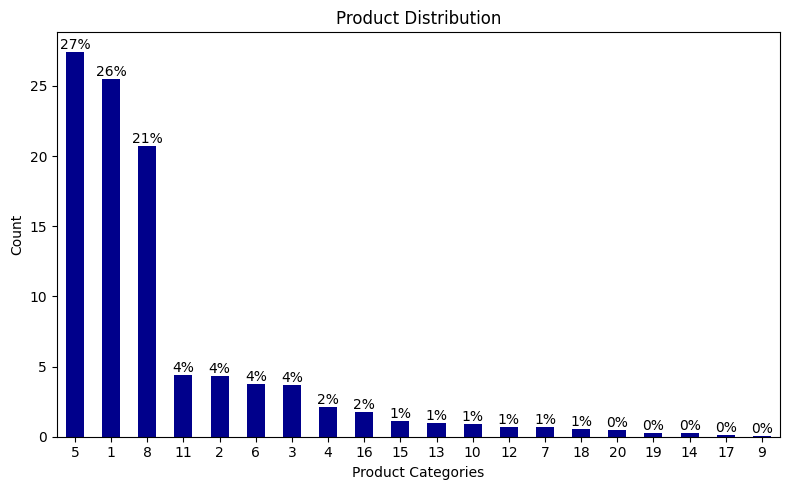

In [71]:
# calculating the product categories distribution in percentage
product = sum(dataset['Product_Category'].value_counts())
value = dataset['Product_Category'].value_counts()
percent = value * 100 / product

# Plot the bar graph
ax = percent.plot(kind='bar', color='darkblue', figsize=(8, 5))

# Add percentages on top of the bars
for index, percentage in enumerate(percent):
    ax.text(index, percentage, f'{percentage:1.0f}%', ha='center', va='bottom', fontsize=10)

# Set labels and title
plot.title('Product Distribution')
plot.xlabel('Product Categories')
plot.ylabel('Count')
plot.xticks(rotation=0)  # Rotate x-axis labels for better visibility
plot.tight_layout()  # Adjust layout to fit everything nicely
plot.show()

    Product_Category      Purchase
9                 10  19675.570927
6                  7  16365.689600
5                  6  15838.478550
8                  9  15537.375610
14                15  14780.451828
15                16  14766.037037
0                  1  13606.218596
13                14  13141.625739
1                  2  11251.935384
16                17  10170.759516


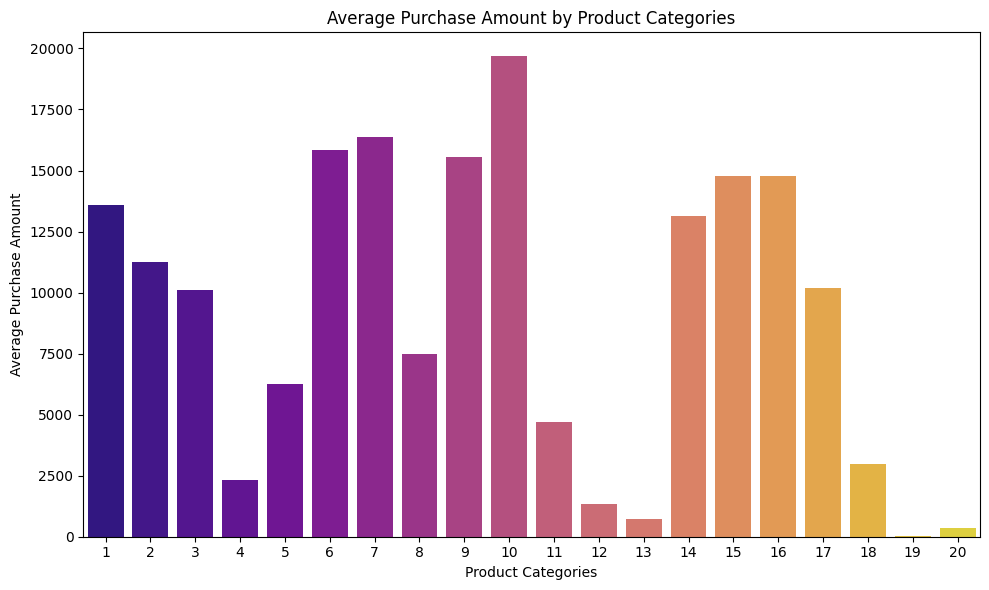

In [6]:
# Average Purchase Amount by Product Categories
product_purchase = dataset.groupby('Product_Category')['Purchase'].mean().reset_index()
print(product_purchase.sort_values(by='Purchase', ascending=False).head(10))

# Bar Plot: Average Purchase by Product Categories
plot.figure(figsize=(10, 6))
plot2.barplot(data=product_purchase, x='Product_Category', y='Purchase', palette='plasma')
plot.title('Average Purchase Amount by Product Categories')
plot.xlabel('Product Categories')
plot.ylabel('Average Purchase Amount')
plot.tight_layout()
plot.show()

    Product_Category    Purchase
0                  1  1910013754
4                  5   941835229
7                  8   854318799
5                  6   324150302
1                  2   268516186
2                  3   204084713
15                16   145120612
10                11   113791115
9                 10   100837301
14                15    92969042


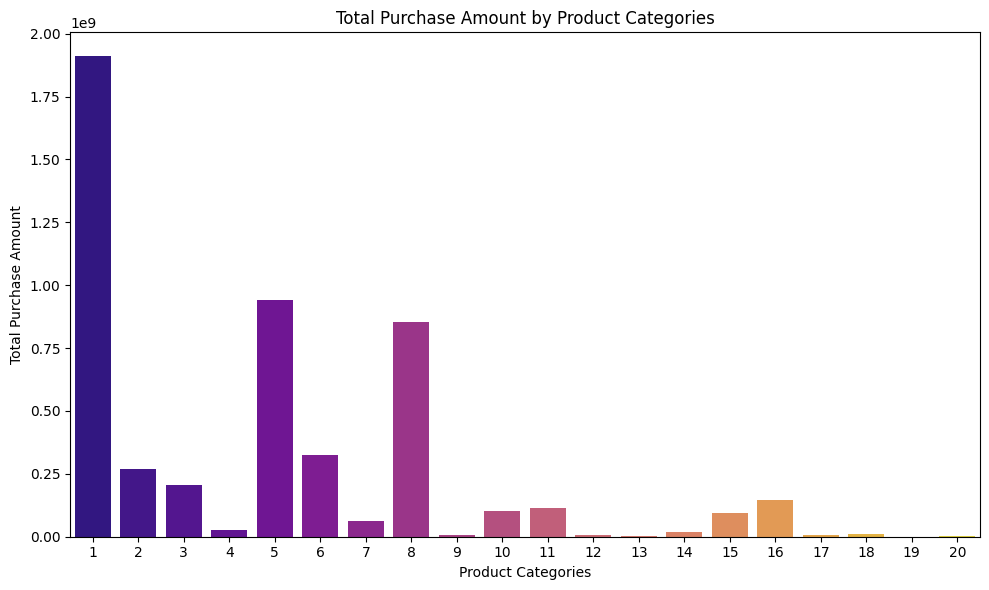

In [5]:
# Total Purchase Amount by Product Categories
total_product_purchase = dataset.groupby('Product_Category')['Purchase'].sum().reset_index()
print(total_product_purchase.sort_values(by='Purchase', ascending=False).head(10))

# Bar Plot: Total Purchase by Product Categories
plot.figure(figsize=(10, 6))
plot2.barplot(data=total_product_purchase, x='Product_Category', y='Purchase', palette='plasma')
plot.title('Total Purchase Amount by Product Categories')
plot.xlabel('Product Categories')
plot.ylabel('Total Purchase Amount')
plot.tight_layout()
plot.show()

**Checking top 10 most sold products**

Top 10 Products by Number of Purchases:
 P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
P00184942    1440
P00046742    1438
P00058042    1422
P00145042    1406
P00059442    1406
Name: Product_ID, dtype: int64


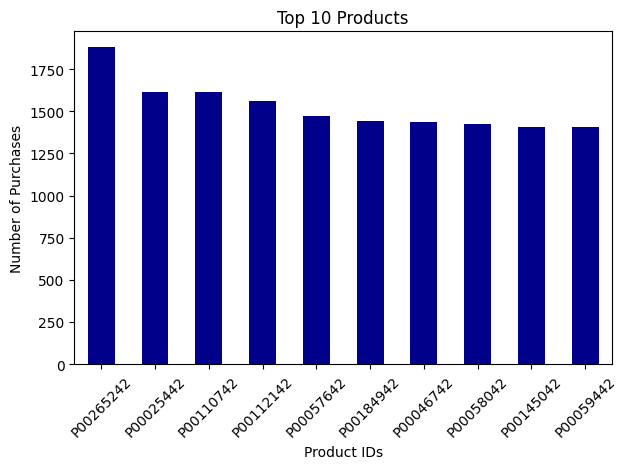

In [88]:
# Top 10 most frequently purchased products
product_frequency = dataset['Product_ID'].value_counts().head(10)
print("Top 10 Products by Number of Purchases:\n",product_frequency)

product_frequency.plot(kind='bar', color='darkblue')
plot.title('Top 10 Products')
plot.xlabel('Product IDs')
plot.xticks(rotation=45)
plot.ylabel('Number of Purchases')
plot.tight_layout() 
plot.show()